**Install Packages**

In [13]:
!pip install uv
!uv pip install pycaret --system

Using Python 3.10.12 environment at /usr
Audited 1 package in 167ms


**Import Packages**

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import pandas as pd
from pycaret.clustering import *

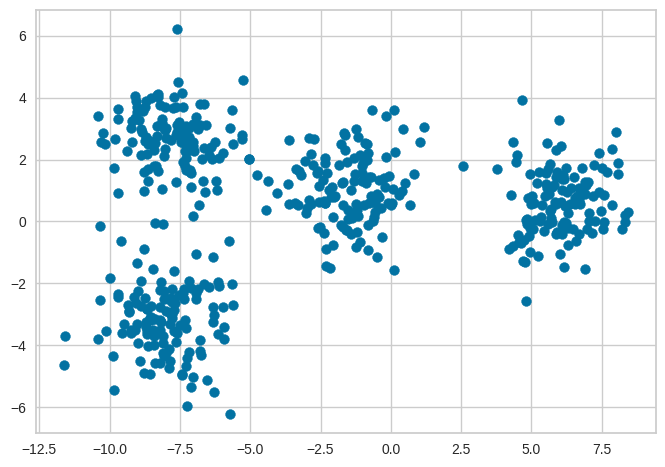

In [16]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=1.1, random_state=999)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [17]:
setup(X, normalize=True)

,Description,Value
0,Session id,4872
1,Original data shape,"(500, 2)"
2,Transformed data shape,"(500, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [31]:
dbscan_model = create_model('dbscan', eps=0.3, min_samples=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5508,543.0181,4.5647,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [32]:
cluster_labels = dbscan_model.labels_
cluster_labels

array([ 0,  1,  2,  2,  1, -1,  1,  1,  2,  1,  0,  2,  1,  1,  0,  0,  2,
        1,  0,  2,  0,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  0,  1,  2,
        0,  0,  0,  0, -1,  0,  1,  2,  1,  1,  1,  0,  1,  2,  1,  0,  2,
        2,  1,  2,  0,  1,  2,  2,  2,  1,  0,  1,  1,  1,  1,  1,  0,  0,
        1,  2,  1,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  1,  2,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  2,  0,  0,  1,  0,
        2,  2,  1,  1,  0,  1,  2,  0,  1,  0,  1,  1,  1,  1,  0,  1,  2,
        2,  0,  0,  1,  0,  0,  1,  2,  0,  0,  2,  1,  2,  0,  0,  2,  1,
        1,  2,  2,  0,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,
        1,  2,  2,  1,  1,  1,  2,  0,  1,  1,  0,  1,  0,  0,  2,  1,  2,
        0,  1,  1,  0,  0,  1,  2,  0,  1,  1,  2,  0,  0,  1,  0,  0,  1,
        1,  1,  0,  2,  0,  1,  1,  1,  2,  1,  1,  0,  1,  1,  1,  0,  2,
        2,  1,  1,  2,  1,  0,  2,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,
        1,  1,  0,  1,  2

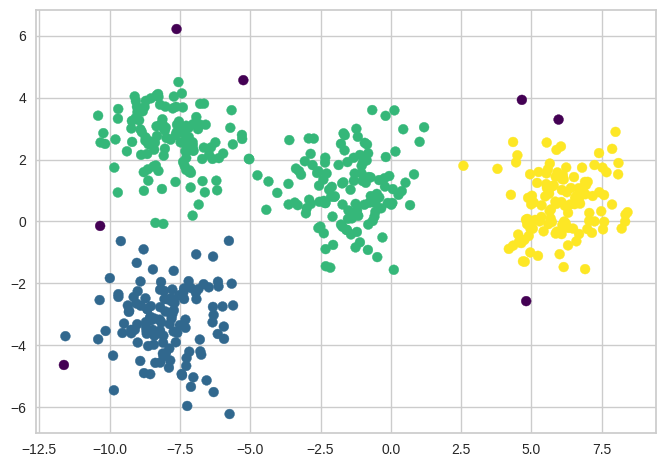

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')

In [21]:
y_true

array([2, 1, 0, 0, 1, 0, 1, 3, 0, 3, 2, 0, 3, 1, 2, 2, 0, 1, 2, 0, 2, 3,
       0, 1, 3, 3, 3, 3, 0, 1, 0, 2, 3, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 3, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 3, 3, 3, 3, 3,
       2, 2, 3, 0, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3, 0, 3, 2, 2, 2,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 0, 2, 2, 1, 2, 0, 0, 3, 1, 2, 3, 0, 2,
       1, 2, 1, 3, 3, 1, 2, 3, 0, 0, 2, 2, 1, 2, 2, 3, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 1, 3, 0, 0, 1, 1, 1, 3, 3, 1, 3, 0, 1, 3, 0, 1, 3, 3, 1,
       0, 0, 3, 3, 1, 0, 2, 3, 1, 2, 3, 2, 2, 0, 1, 0, 2, 3, 1, 2, 2, 1,
       0, 2, 1, 2, 0, 2, 2, 3, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 3, 0, 1, 3,
       2, 1, 3, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 3, 1,
       1, 1, 3, 2, 3, 0, 1, 2, 3, 1, 2, 0, 0, 2, 2, 3, 0, 1, 2, 0, 2, 3,
       1, 0, 0, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 1, 3, 1, 0, 2,
       2, 1, 1, 1, 0, 3, 0, 1, 0, 3, 3, 0, 1, 3, 0, 3, 1, 3, 0, 2, 1, 1,
       0, 0, 0, 3, 0, 1, 2, 1, 1, 2, 2, 0, 0, 3, 1,

In [22]:
from scipy.stats import mode

labels = np.zeros_like(cluster_labels)
labels.fill(-1)
for i in range(10):
    mask = (cluster_labels == i)
    labels[mask] = mode(y_true[mask])[0]
labels

array([-1,  1,  0,  0,  1, -1,  1,  3,  0,  3,  2,  0,  3,  1,  2,  2,  0,
        1,  2,  0,  2,  3,  0,  1,  3,  3,  3, -1,  0,  1,  0,  2,  3,  0,
        2,  2,  2,  2, -1,  2,  1,  0,  1,  1,  1,  2,  1,  0,  3,  2,  0,
        0,  1,  0,  2,  1,  0,  0,  0,  1,  2,  3,  3,  3,  3,  3,  2,  2,
        3,  0,  3,  3,  2,  3,  2,  2,  3,  2,  2,  3, -1,  2,  3,  0,  3,
        2,  2,  2,  1,  1,  3,  3,  2,  3,  3,  1,  3,  0,  2,  2,  1,  2,
        0,  0,  3,  1,  2,  3,  0,  2,  1,  2,  1,  3, -1,  1,  2,  3,  0,
        0,  2,  2,  1, -1,  2,  3,  0,  2, -1,  0,  1,  0,  2,  2,  0,  1,
        3,  0,  0, -1,  1,  1,  3,  3,  1,  3,  0,  1,  3,  0,  1,  3,  3,
        1,  0,  0,  3,  3,  1, -1,  2,  3,  1,  2,  3,  2,  2,  0,  1,  0,
       -1,  3,  1,  2,  2,  1,  0,  2,  1, -1,  0,  2,  2,  3,  2,  2,  1,
        1,  1,  2,  0,  2,  1,  1, -1,  0,  1,  3,  2,  1,  3,  1,  2,  0,
        0,  1,  1,  0,  1,  2,  0,  1,  2,  2, -1,  1,  2,  1, -1, -1,  1,
        1,  3,  2,  3,  0

**Clustering Quality Metrics**

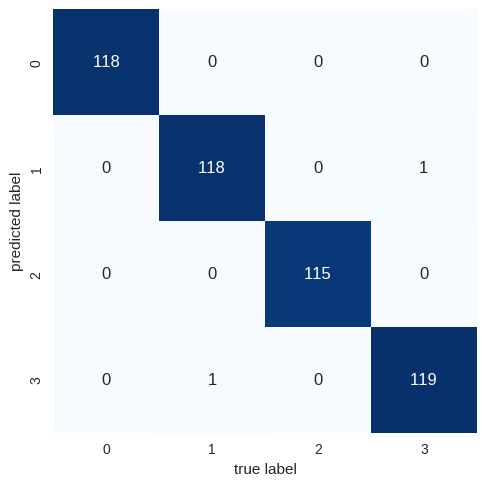

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

0.94